In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
file_path = 'https://docs.google.com/spreadsheets/d/1bV1D_t2lE1LCVu66AeXPS9Mrg3UNA97M/export?format=csv'
data = pd.read_csv(file_path)

In [ ]:

# Ensure all values are numeric (convert non-numeric values to NaN)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
# Remove rows where all values are zero
data = data.loc[~(data.eq(0).all(axis=1))]

#data.tail(30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26240 entries, 0 to 26239
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   leg_3_to_leg_1_time       26240 non-null  float64
 1   leg_2_to_leg_1_time       26240 non-null  float64
 2   leg_2_correction_percent  26240 non-null  float64
 3   resistance                26240 non-null  float64
 4   rsi_filter_passed         26240 non-null  float64
 5   normalized_rsi            26240 non-null  float64
 6   max_price_move            26240 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


In [ ]:
data.describe()

,leg_3_to_leg_1_time,leg_2_to_leg_1_time,leg_2_correction_percent,resistance,rsi_filter_passed,normalized_rsi,max_price_move
count,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000
mean,1.680755,0.906973,61.097866,0.319703,0.596227,68.825495,774.545198
std,2.979507,2.115250,21.746693,0.466370,0.490662,6.386392,7472.798546
min,0.010000,0.010000,6.000000,0.000000,0.000000,34.000000,-27760.000000
25%,0.540000,0.280000,44.000000,0.000000,0.000000,64.000000,27.000000
50%,1.050000,0.530000,61.000000,0.000000,1.000000,68.000000,150.500000
75%,1.970000,0.990000,79.000000,1.000000,1.000000,73.000000,903.250000
max,162.000000,115.000000,100.000000,1.000000,1.000000,96.000000,28870.000000


In [ ]:
data.shape

(26240, 7)

In [ ]:
data.isnull().sum()

,0
leg_3_to_leg_1_time,0
leg_2_to_leg_1_time,0
leg_2_correction_percent,0
resistance,0
rsi_filter_passed,0
normalized_rsi,0
max_price_move,0


In [ ]:
normalized_df = keras.utils.normalize(data)
type(normalized_df)
data = pd.DataFrame(normalized_df, columns=["leg_3_to_leg_1_time","leg_2_to_leg_1_time","leg_2_correction_percent","resistance","rsi_filter_passed","normalized_rsi","max_price_move"])
data

,leg_3_to_leg_1_time,leg_2_to_leg_1_time,leg_2_correction_percent,resistance,rsi_filter_passed,normalized_rsi,max_price_move
0,0.000078,0.000026,0.002938,0.0,0.000000,0.003711,-0.999989
1,0.000298,0.000114,0.002873,0.0,0.000000,0.003276,0.999990
2,0.000150,0.000109,0.003749,0.0,0.000000,0.003903,-0.999985
3,0.000014,0.000013,0.002517,0.0,0.000000,0.003647,-0.999990
4,0.000064,0.000054,0.004828,0.0,0.000051,0.003544,-0.999982
...,...,...,...,...,...,...,...
26235,0.011150,0.003294,0.768682,0.0,0.000000,0.625082,0.135153
26236,0.003185,0.000691,0.130461,0.0,0.003837,0.264759,0.955436
26237,0.036344,0.010666,0.379242,0.0,0.000000,0.280481,0.880949
26238,0.013567,0.007489,0.586090,0.0,0.010854,0.662065,0.466702


In [ ]:

# Separate features and target variable
X = data.drop('max_price_move', axis=1)
y = data['max_price_move']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler for scaling the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)  # Output layer for regression
])

# Compile the model with mean squared error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

# Predict on new data (example)
predictions = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.5034 - mae: 0.5652 - val_loss: 0.4175 - val_mae: 0.4725
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4301 - mae: 0.4969 - val_loss: 0.3944 - val_mae: 0.4807
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3884 - mae: 0.4510 - val_loss: 0.3368 - val_mae: 0.3933
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3439 - mae: 0.4006 - val_loss: 0.3235 - val_mae: 0.3863
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3349 - mae: 0.3918 - val_loss: 0.3172 - val_mae: 0.3633
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3225 - mae: 0.3722 - val_loss: 0.3113 - val_mae: 0.3520
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3233 - mae: 0.3683 - val_loss: 0.3080 - val_mae: 0.3434
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3187 - mae: 0.3600 - val_loss: 0.3058 - val_mae: 0.3468
Epoch 9/50
125/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

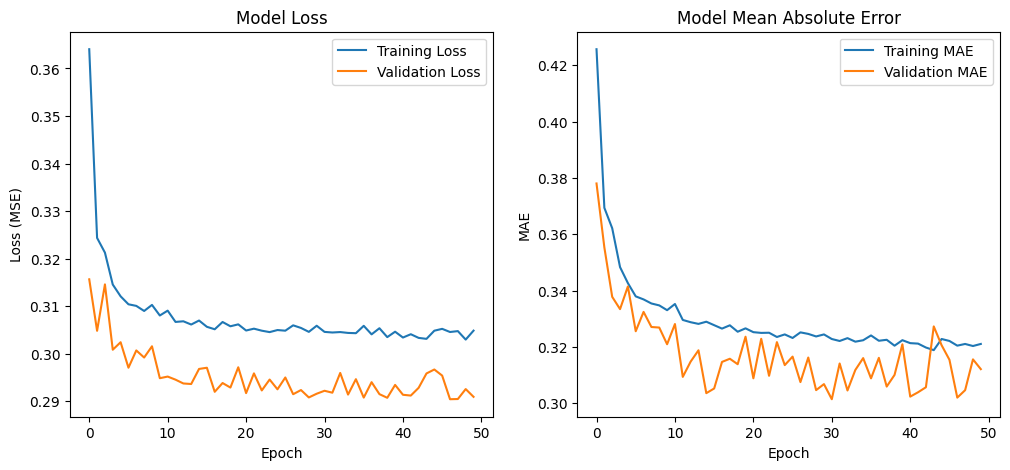

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Mean Absolute Error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [ ]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")


164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3059 - mae: 0.3255
Test Loss (MSE): 0.30709418654441833
Test Mean Absolute Error (MAE): 0.3282051682472229


In [ ]:
import numpy as np

# Make predictions
predictions = model.predict(X_test_scaled).flatten()

# Compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df.head(10))  # Display first 10 rows for a quick check


164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         Actual  Predicted
24601  0.999761   0.335957
4343   0.999967   0.126162
8364   0.877542   0.894811
23663 -0.043279   0.077047
2516   0.999988   0.128011
22894  0.890189   0.871288
20395  0.918378   0.895381
8316   0.999865   0.135293
9798   0.999359   0.527359
1710   0.999990   0.126404
